## Segmentação de Clientes

A segmentação de clientes é o processo de dividir os clientes em grupos com base em características comuns, para que as empresas possam comercializar para cada grupo de forma eficaz e adequada, ou simplesmente compreender o padrão de consumo dos clientes.

## Como Segmentar Clientes?

A segmentação de clientes exige que uma empresa colete informações específicas - dados - sobre clientes e analise-as para identificar padrões que podem ser usados para criar segmentos.

Parte disso pode ser obtida a partir de informações de compra - cargo, geografia, produtos adquiridos, por exemplo. Algumas delas podem ser obtidas da forma como o cliente entrou no seu sistema. Um profissional de marketing que trabalha com uma lista de e-mail de inscrição pode segmentar mensagens de marketing de acordo com a oferta de inscrição que atraiu o cliente, por exemplo. Outras informações, no entanto, incluindo dados demográficos do consumidor, como idade e estado civil, precisarão ser adquiridas de outras maneiras.


<h2> Neste projeto, iremos realizar a segmentação de clientes de um food delivery, aplicativo de entregas de comida. <br/><br/>
     O objetivo da segmentação, é compreender e avaliar padrões de compras dos consumidores.  <br/><br/>
     Com isto, será possivel adotar estratégias de marketings específicas para alcançar diferentes grupos.</h2>



In [ ]:
# Imports

# Manipulação e visualização de dados
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Carrega o dataset
df_food_delivery = pd.read_csv("marketing_clientes.csv", encoding = 'utf-8')

In [42]:
# Resumo do dataset (260.645 linhas e 7 colunas)
df_food_delivery.shape

(260645, 7)

In [43]:
# Primeiras ceélulas do dataset
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


<h2> Variáveis do dataset: </h2><br/>
id_transacao: ID da transação. Um mesmo ID pode ter vários itens de um pedido<br/><br/> 
horario_pedido: Horário exato do pedido<br/><br/>
localidade: Localidade que processou o pedido (unidade do restaurante)<br/><br/>
nome_item: Nome do item (pizza, salada, bebida e sobremesa)<br/><br/>
quantidade_item: Quantidade de itens no pedido<br/><br/>
latitude: Latitude da localidadeonde o pedido foi gerado<br/><br/>
longitude: Longitude da localidadeonde o pedido foi gerado

<h3> Análise explanatória dos dados </h3> <br/>

Vamos explorar os dados e compreender as relações entre as variáveis

In [44]:
# Verifica o total de valores únicos por coluna 
df_food_delivery.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

Muitos pedidos tiveram mais de um item comprado

In [45]:
# Tipos de dados
df_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [46]:
# Resumo das colunas numéricas
df_food_delivery.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


Como previsto, houve 2,44 itens por pedidos em média. 

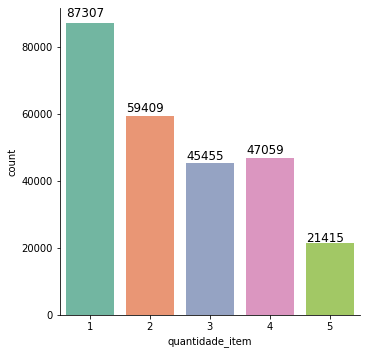

In [47]:
# Plot da quantidade de items por pedido
plot2 = sns.catplot(x="quantidade_item", kind="count", data=df_food_delivery, palette="Set2")
ax = plot2.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

Text(0.5, 1.0, 'Proporção de quantidade de itens por pedido')

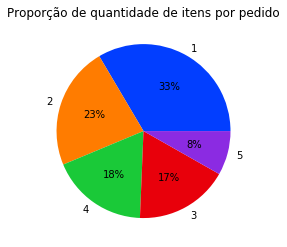

In [48]:

# Proporção das variantes mostradas aos usuários
plt.pie(df_food_delivery['quantidade_item'].value_counts(), labels = df_food_delivery['quantidade_item'].value_counts().index, colors = sns.color_palette('bright')[0:5], autopct='%.0f%%')
plt.title("Proporção de quantidade de itens por pedido")

A maioria das pessoas pediram apenas 1 item por pedido

In [49]:
# Transformado a variável horario pedido em formato de data
df_food_delivery['horario_pedido'] = pd.to_datetime(df_food_delivery['horario_pedido'], format='%Y-%m-%d')

In [50]:
# Criando uma nova variável com o ano da data
df_food_delivery['data'] = df_food_delivery['horario_pedido'].dt.strftime('%Y-%m-%d')

In [51]:
# Criando uma nova variável com o horario do pedido
df_food_delivery['horario'] = df_food_delivery['horario_pedido'].dt.strftime('%H:%M:%S')

In [52]:
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude,data,horario
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140,2019-01-16,18:33:00
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140,2019-01-16,18:33:00
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140,2019-01-16,18:33:00
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059,2019-09-04,12:36:00
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059,2019-09-04,12:36:00


Vamos transformar as novas variáveis em formato data/hora antes de manipulá-las

In [53]:
df_food_delivery.dtypes

id_transacao               object
horario_pedido     datetime64[ns]
localidade                  int64
nome_item                  object
quantidade_item             int64
latitude                  float64
longitude                 float64
data                       object
horario                    object
dtype: object

In [54]:
# Transformado a variável data em formato de data
df_food_delivery['data'] = pd.to_datetime(df_food_delivery['data'], format='%Y-%m-%d')

In [55]:
# Criando a nova coluna que mostra o dia da venda
df_food_delivery['dia']  = df_food_delivery['data'].dt.strftime('%d')

In [56]:
# Criando a nova coluna que mostra o mês da venda
df_food_delivery['mes']  = df_food_delivery['data'].dt.strftime('%m')

In [57]:
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude,data,horario,dia,mes
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059,2019-09-04,12:36:00,04,09
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059,2019-09-04,12:36:00,04,09


In [58]:
# Criando a nova coluna que mostra a hora da venda
df_food_delivery['hora'] = df_food_delivery['horario'].apply(lambda x: x[0:2])

In [59]:
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude,data,horario,dia,mes,hora
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01,18
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01,18
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140,2019-01-16,18:33:00,16,01,18
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059,2019-09-04,12:36:00,04,09,12
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059,2019-09-04,12:36:00,04,09,12


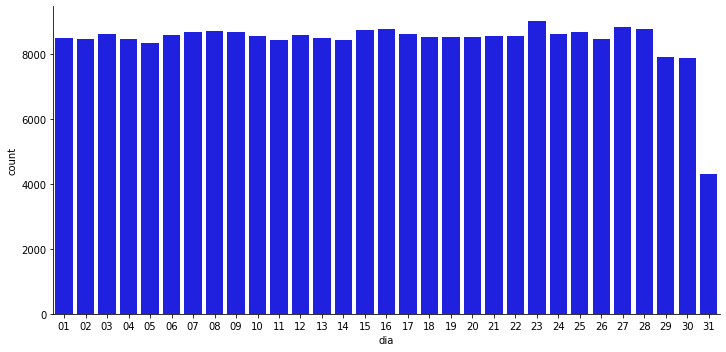

In [60]:
# Quantidade de pedidos por dia
sns.catplot(x="dia", kind="count", data=df_food_delivery, color = "blue", height=5, aspect=2)

Não houve grandes variações de pedidos ao longo do mês, com exceção do dia 31, o que pode indica que as pessoas estão esperando receber o salário no início do mês seguinte

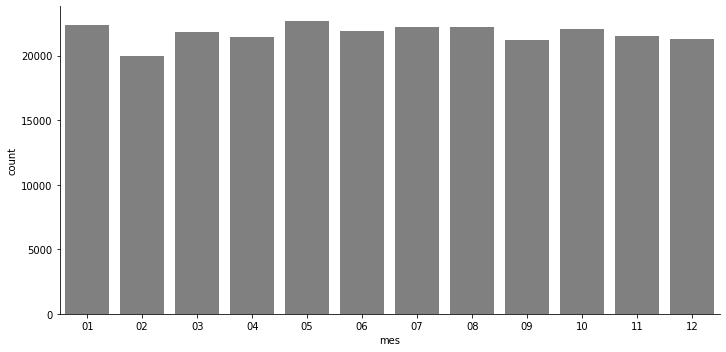

In [61]:
# Quantidade de pedidos por mês
sns.catplot(x="mes", kind="count", data=df_food_delivery, color = "gray", height=5, aspect=2)

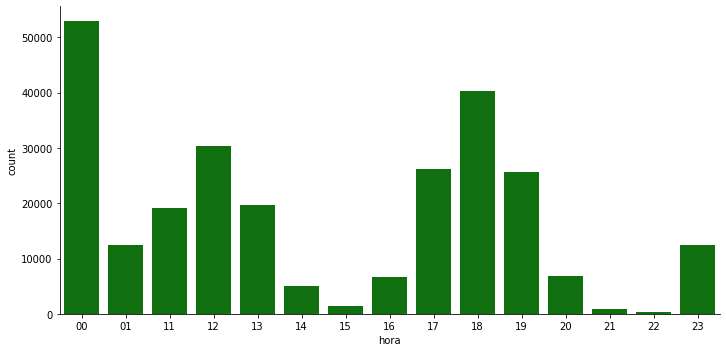

In [62]:
# Quantidade de pedidos por hora
sns.catplot(x="hora", kind="count", data=df_food_delivery, color = "green", height=5, aspect=2)

O horário com mais demanda de pedido foi a meia noite. Além disto, os horários mais demandados é ao meio dia (horário de almoço) e as 19 horas (horário do jantar). Ou seja, os dados estão como esperado

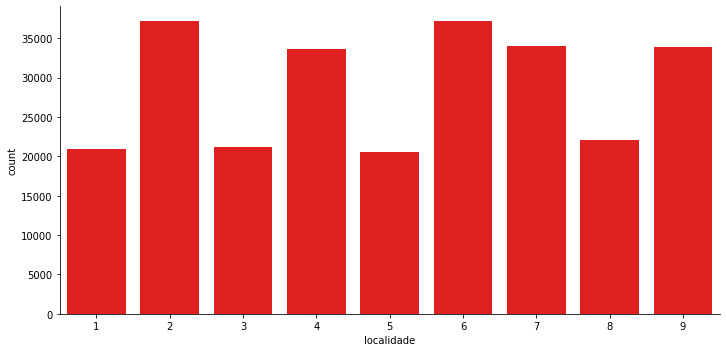

In [66]:
# Distribuição de pedidos por localidade
sns.catplot(x="localidade", kind="count", data=df_food_delivery, color = "red", height=5, aspect=2)

<h2> Vamos criar uma tabela pivot com os indíces das transações para facilitar a manipulação dos dados dos pedidos </h2>

In [69]:
# Vamos criar uma tabela pivot com id_transacao, nome_item e quantidade_item
df_pivot = df_food_delivery.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [70]:
# Substituímos possíveis valores NA gerados no pivot, por 0 e transformamos o índice em coluna
df_pivot = df_pivot.fillna(0).reset_index()

In [71]:
# Tipos de dados nas colunas
df_pivot.dtypes

nome_item
id_transacao     object
bebida          float64
pizza           float64
salada          float64
sobremesa       float64
dtype: object

In [72]:
# Nomes das colunas
df_pivot.columns

Index(['id_transacao', 'bebida', 'pizza', 'salada', 'sobremesa'], dtype='object', name='nome_item')

In [73]:
# Visualiza os dados
df_pivot.head()

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0


In [74]:
# Valores únicos
df_pivot.nunique()

nome_item
id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
dtype: int64

In [75]:
# Removendo valores nulos
df_pivot.isnull().sum()

nome_item
id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
dtype: int64

In [76]:
# Vamos incluir a coluna localidade e para fazer o merge precisamos de uma coluna em comum, nesse caso, id_transacao
df_pivot2 = df_pivot.merge(df_food_delivery[['id_transacao', 'localidade']])

In [77]:
# Visualiza os dados
df_pivot2.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9


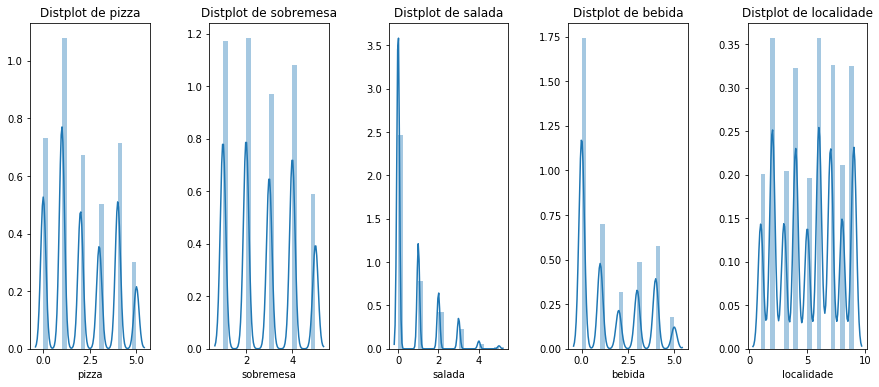

In [81]:
# Plot dos tipos de pedido por localidade

# Tamanho da figura
plt.figure(1 , figsize = (15 , 6))

# Inicializa o contador
n = 0 

# Loop pelas colunas
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida', 'localidade']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_pivot2[x] , bins = 20)
    plt.title('Distplot de {}'.format(x))
plt.show()

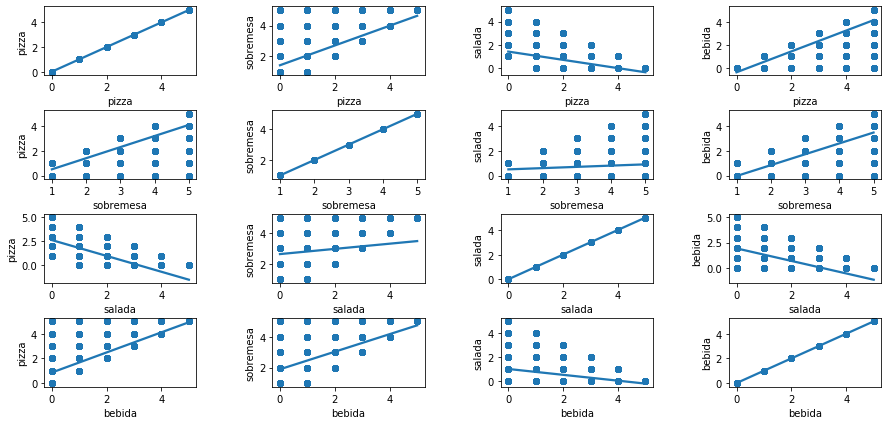

In [82]:
# Relação Entre os Atributos

# Tamanho da figura
plt.figure(1 , figsize = (15 , 7))

# Inicializa o contador
n = 0 

# Loop pelos atributos
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for y in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_pivot2)
        plt.ylabel(y)
plt.show()

In [85]:
# Índice
df_pivot2.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            260635, 260636, 260637, 260638, 260639, 260640, 260641, 260642,
            260643, 260644],
           dtype='int64', length=260645)

In [88]:
# Fazemos o reset no índice e gravamos o resultado em outro dataframe
df_item_pedidos_idx = df_pivot2.reset_index()

In [89]:
# Pronto, agora temos uma coluna de ID com valor único para cada registro
df_item_pedidos_idx.head()

,index,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0,0x10000a,0.0,1.0,0.0,1.0,9
1,1,0x10000a,0.0,1.0,0.0,1.0,9
2,2,0x100058,0.0,2.0,0.0,2.0,6
3,3,0x100058,0.0,2.0,0.0,2.0,6
4,4,0x1000c8,4.0,4.0,1.0,5.0,9


In [90]:
# Filtrando o dataframe por colunas 
df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]

,index,bebida,pizza,sobremesa,salada
0,0,0.0,1.0,1.0,0.0
1,1,0.0,1.0,1.0,0.0
2,2,0.0,2.0,2.0,0.0
3,3,0.0,2.0,2.0,0.0
4,4,4.0,4.0,5.0,1.0
...,...,...,...,...,...
260640,260640,1.0,1.0,1.0,0.0
260641,260641,0.0,2.0,2.0,0.0
260642,260642,0.0,2.0,2.0,0.0
260643,260643,0.0,1.0,1.0,0.0


In [91]:
# Vamos gerar um novo dataframe com o slice anterior
df = df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]

In [92]:
# Dataset
df.head()

,index,bebida,pizza,sobremesa,salada
0,0,0.0,1.0,1.0,0.0
1,1,0.0,1.0,1.0,0.0
2,2,0.0,2.0,2.0,0.0
3,3,0.0,2.0,2.0,0.0
4,4,4.0,4.0,5.0,1.0


<h2> Modelagem Preditiva </h2>

Clusterização é um processo de aprendizagem não supervisionada, quando entregamos a um algoritmo de Machine Learning somente os dados de entrada e durante o treinamento, o algoritmo cria um modelo capaz de gerar saídas, nesse caso grupos, ou clusters.

Neste projeto, iremos agrupar os clientes por padrões similares com base nos dados

### Segmentação 1

Vamos realizar nossa primeira segmentação usando 2 variáveis.

#### Segmentação 1 - Definindo o Número de Atributos


Usando 2 Variáveis (Pizza e Sobremesa).

In [95]:
# Usaremos duas variáveis (pizza e sobremesa)
X1 = df[['pizza' , 'sobremesa']].iloc[: , :].values

In [96]:
# Lista do WCSS
wcss_X1 = []

Precisamos encontrar o número ideal de clusters, ou seja, a quantidade de agrupamentos que iremos ter ao padronizar a segmentação. 

Representamos graficamente a relação entre o número de clusters e a soma dos quadrados dentro do cluster (Within Cluster Sum of Squares - WCSS) e, em seguida, selecionamos o número de clusters nos quais a mudança no WCSS começa a se estabilizar

#### Segmentação 1 - Encontrando o Valor Ideal de Clusters

Vamos testar diferentes valores de K (valores de cluster) entre 2 e 10.

In [97]:
# Loop para testar os valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

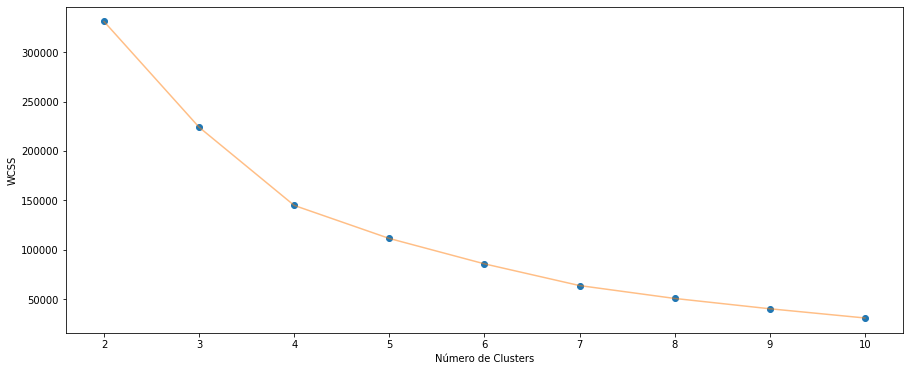

In [98]:
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

Como esperado, quanto maior a quantidade de clusters menor será o WCSS, pois menos será a distância dos pontos de cada cluster ao seu respectivo centróide. Porém neste caso, não seria viável utilizar 10 clusters para a segmentação de fast-food. Vamos iniciar com 2 clusters e avaliar o modelo.

#### Segmentação 1 - Construindo e Treinando o Modelo

In [99]:
# Criação do modelo
modelo_seg1 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [100]:
# Treinamento do modelo
modelo_seg1.fit(X1)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [101]:
# Extração dos labels (classificação dos dados nos respectivos clusters)
labels1 = modelo_seg1.labels_
labels1

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
# Extração dos centróides (Posição dos dados em coordenadas cartesianas)
centroids1 = modelo_seg1.cluster_centers_
centroids1

array([[0.9613099 , 1.87537776],
       [3.76652414, 4.07619962]])

#### Segmentação 1 - Visualização e Interpretação dos Segmentos

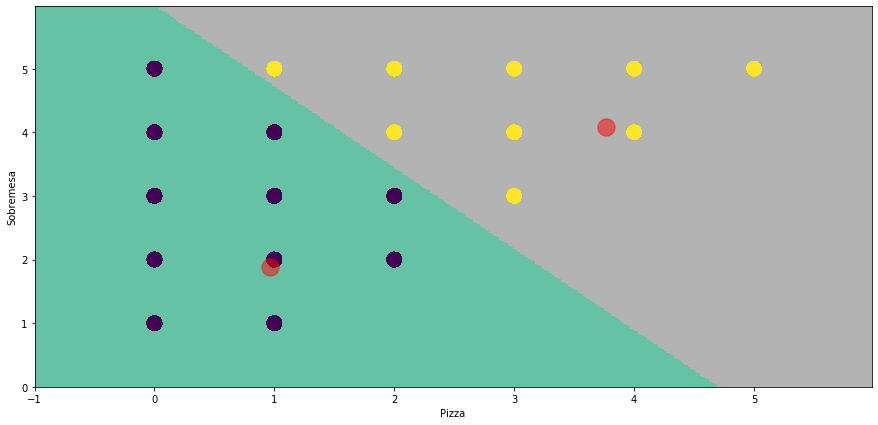

In [109]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'sobremesa', data = df, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

**Interpretação**: 

- O ponto vermelho é o centróide de cada cluster (segmento).


- No cluster 1 (área em verde) temos os clientes que pediram 0, 1 ou 2 Pizzas. Em todos os casos houve pedido de Sobremesa.


- No cluster 2 (área em cinza) estão clientes que pediram 2, 3, 4 ou 5 Pizzas. Perceba que à medida que o pedido tem maior número de Pizzas, também aumenta o número de Sobremesas.

**Análise**:

- Cluster 1 - Clientes que pedem menos Pizzas. Todos pedem sobremesa.

- Cluster 2 - Clientes que pedem mais Pizzas. Todos pedem sobremesa em volume maior.

Como estratégia de Marketing, poderíamos oferecer ao cliente uma sobremesa grátis no caso de comprar mais uma Pizza de maior valor. Com base na Segmentação provavelmente essa estratégia teria sucesso.

### Segmentação 2

Segmentação 2 - Variáveis Pizza e Salada

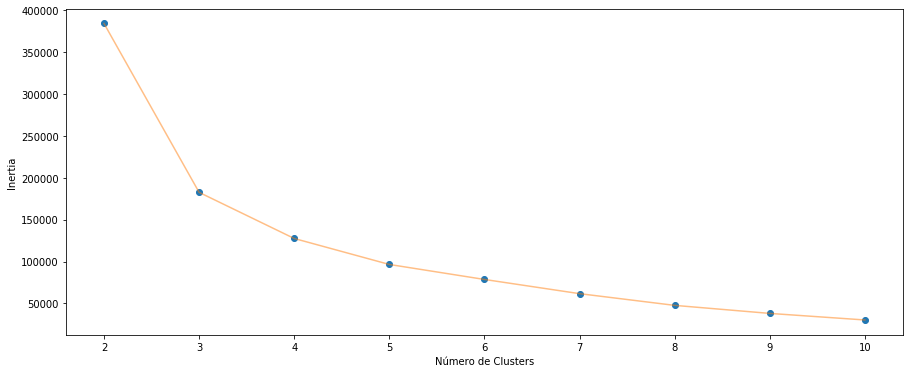

In [113]:
# Usaremos duas variáveis
X1 = df[['pizza' , 'salada']].iloc[: , :].values

# Lista de valores de Inertia (Inertia e WCSS são a mesma coisa)
inertia = []

# Loop para testar os valores de K
for n in range(2 , 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    inertia.append(modelo.inertia_)

# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inertia')
plt.show()

In [114]:
# Criação do modelo com 3 clusters
modelo_seg2 = (KMeans(n_clusters = 3,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )

# Treinamento do modelo
modelo_seg2.fit(X1)

# Labels
labels2 = modelo_seg2.labels_

# Centróides
centroids2 = modelo_seg2.cluster_centers_

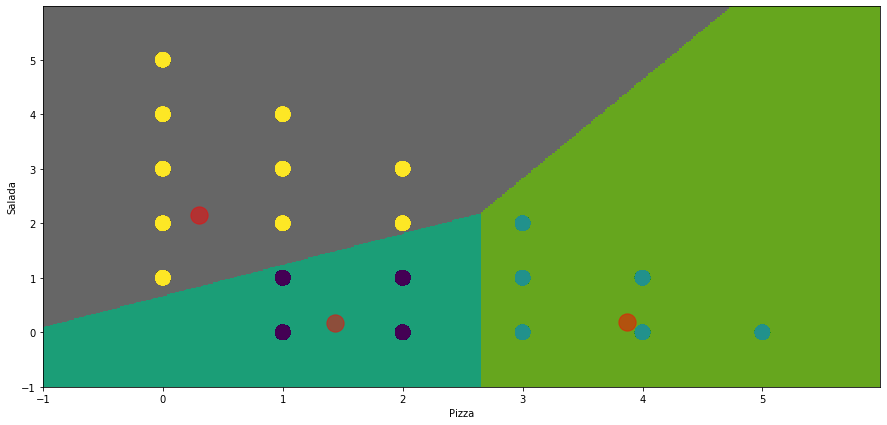

In [115]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg2.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Dark2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'salada', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()

**Interpretação**: 

- O ponto vermelho é o centróide de cada cluster (segmento).


- No cluster 1 (área em cinza) temos os clientes que pediram menos Pizzas e mais Saladas.


- No cluster 2 (área em verde escuro) temos os clientes que pediram poucas Pizzas e poucas Saladas.


- No cluster 3 (área em verde claro) estão clientes que pediram mais Pizzas e menos Saladas.

**Análise**:

Os clusters 1 e 3 são de clientes com comportamentos opostos. A equipe de Marketing poderia concentrar os esforços nos clientes do cluster 2, pois são clientes que compram Pizzas e Saladas e, portanto, tendem a consumir mais itens variados evitando manter os estoques cheios de um único item. 

Ou então, concentrar os esforços nos clientes que consomem produtos que geram mais lucro. Teríamos que verificar qual item, Pizza ou Salada, é mais rentável.

In [126]:
# Shape dos labels
labels2.shape

(260645,)

In [127]:
# Converte o array para dataframe
df_labels = pd.DataFrame(labels2)

In [128]:
# Visualiza
df_labels.head(5)

,0
0,0
1,0
2,0
3,0
4,1


In [129]:
# Vamos fazer o merge de df2 e os labels (clusters) encontrados pelo modelo
# Lembre-se que usamos somente 3 variáveis para criar a segmentação
df_final = df.merge(df_labels, left_index = True, right_index = True)

In [130]:
# Visualiza
df_final

,index,bebida,pizza,sobremesa,salada,0
0,0,0.0,1.0,1.0,0.0,0
1,1,0.0,1.0,1.0,0.0,0
2,2,0.0,2.0,2.0,0.0,0
3,3,0.0,2.0,2.0,0.0,0
4,4,4.0,4.0,5.0,1.0,1
...,...,...,...,...,...,...
260640,260640,1.0,1.0,1.0,0.0,0
260641,260641,0.0,2.0,2.0,0.0,0
260642,260642,0.0,2.0,2.0,0.0,0
260643,260643,0.0,1.0,1.0,0.0,0


In [131]:
# Ajusta o nome da coluna
df_final.rename(columns = {0:"cluster"}, inplace = True)

In [132]:
# Visualiza
df_final

,index,bebida,pizza,sobremesa,salada,cluster
0,0,0.0,1.0,1.0,0.0,0
1,1,0.0,1.0,1.0,0.0,0
2,2,0.0,2.0,2.0,0.0,0
3,3,0.0,2.0,2.0,0.0,0
4,4,4.0,4.0,5.0,1.0,1
...,...,...,...,...,...,...
260640,260640,1.0,1.0,1.0,0.0,0
260641,260641,0.0,2.0,2.0,0.0,0
260642,260642,0.0,2.0,2.0,0.0,0
260643,260643,0.0,1.0,1.0,0.0,0


<h2> Conseguimos classificar os clientes, padronizando e agrupando de acordo com suas preferências com o objetivo de avaliar o comportamento e características separadamente. <br/> <br/> A clusterização é muito útil pois auxilia na tomada de negócios </h2>